In [1]:
! pip install librosa

     -------------------------------------- 253.0/253.0 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.25.1-cp311-cp311-win_amd64.whl (15.0 MB)
  Using cached scipy-1.11.1-cp311-cp311-win_amd64.whl (44.0 MB)
     ---------------------------------------- 9.2/9.2 MB 11.5 MB/s eta 0:00:00
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached numba-0.57.1-cp311-cp311-win_amd64.whl (2.6 MB)
     ---------------------------------------- 1.0/1.0 MB 12.6 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 2.9 MB/s eta 0:00:00
     ------------------------------------- 184.5/184.5 kB 10.9 MB/s eta 0:00:00
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Using cached llvmlite-0.40.1-

  DEPRECATION: audioread is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install matplotlib

  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp311-cp311-win_amd64.whl (1.9 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-10.0.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
array, sampling_rate = librosa.load(librosa.ex('trumpet'))

In [4]:
array

array([-1.40682457e-03, -4.46077698e-04, -4.10981564e-04, ...,
        7.96230779e-06, -3.04169989e-05,  1.27650665e-05], dtype=float32)

In [5]:
sampling_rate

22050

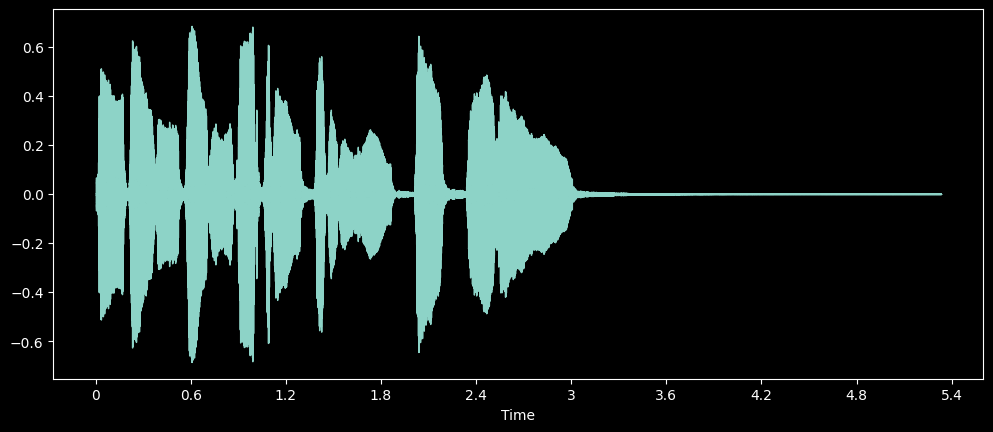

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

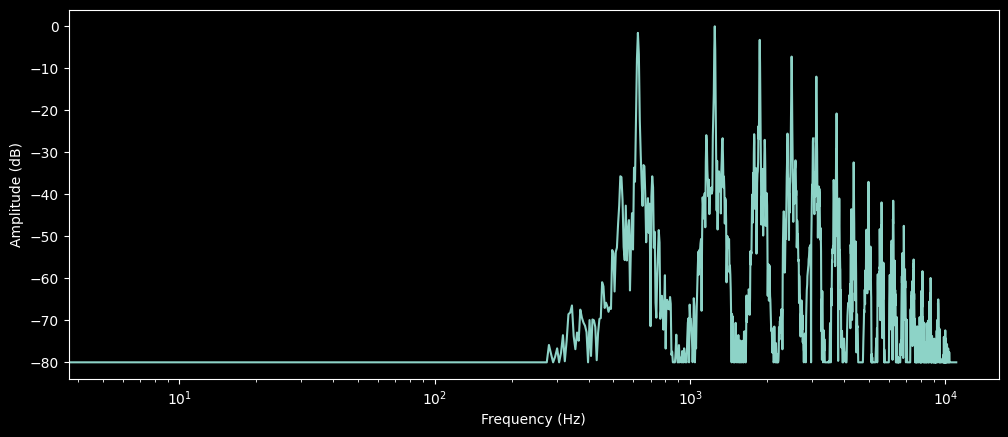

In [6]:
# Discrete Fourier Transform (DFT) of the trumpet audio signal over the first 4096 samples
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

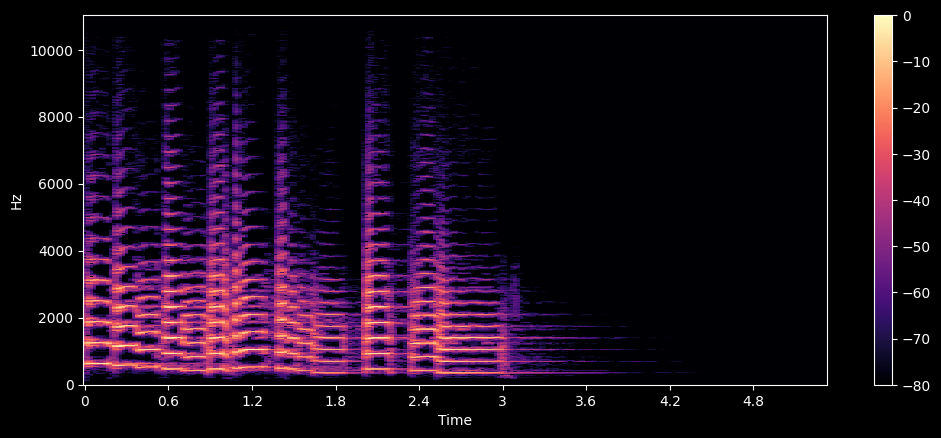

In [7]:
# Spectrogram measures the frequency and amplitude over time
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

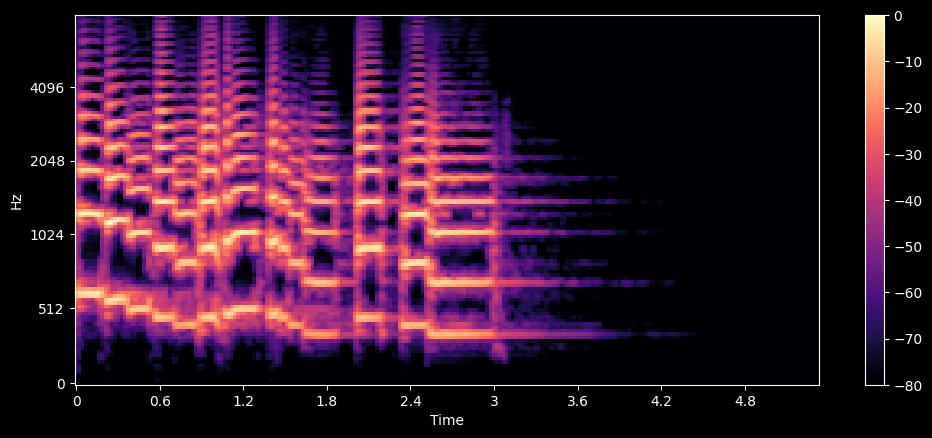

In [8]:
# Mel spectrogram shows the lower frequencies more clearly than the higher frequencies just like the sensitivity of the human ear
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()